## Imports and Opening CSV

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# import geopandas as gpd
# from shapely.geometry import Point,Polygon
# import descartes

In [5]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Start of Data Cleaning
To do: 

'date' needs to be changed from string to datetime 

'waterfront'   needs null values filled

'view'        

'yr_renovated' 

'sqft_basement' needs to be changed from string to float 

In [7]:
df_clean = df.copy()

In [8]:
# changing 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [9]:
# examining the 'waterfront' null entries
df_clean['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [10]:
# i assume here that na means 0
df_clean['waterfront'].fillna(0, inplace=True)
df_clean['waterfront'].isna().sum()

0

In [11]:
# examining the 'view' null entries
df_clean['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
# i assume here that na means 0
df_clean['view'].fillna(0, inplace=True)
df_clean['view'].isna().sum()

0

In [13]:
# examining 'yr_renovated' null entries
df_clean['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# i assume here that na means 0
df_clean['yr_renovated'].fillna(0, inplace=True)
df_clean['yr_renovated'].isna().sum()

0

In [15]:
# examining 'sqft_basement' string values
df_clean['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1481.0        1
2730.0        1
4130.0        1
3000.0        1
3500.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
# replacing strings with floats
df_clean['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace = True)

In [17]:
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

In [18]:
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
# checking to make sure we cleaned all the columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [20]:
# save the cleaned csv back into our data folder
df_clean.to_csv('data/kc_house_data_clean.csv', index=False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### End of Data Cleaning

# FSM
First Simple Model

Just a quick first model based on the correlations we see above. Working with **price** and **sqft_living**

In [21]:
# look at correlations to find a starting point for our FSM
df_clean.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Null Hypothesis: Square footage does not affect price

Alternate Hypothesis: Square footage does affect price

alpha = 0.05

In [22]:
# start of fsm (first simple model)
# in this case it seems like it will be sqft_living

formula = 'price ~ sqft_living'
df_fsm = ols(formula, df_clean).fit()
df_fsm_summ = df_fsm.summary()
df_fsm_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:06:21   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We reject the null hypothesis that square footage does not affect price. The p-value is 0, which is less than alpha of 0.05

Let's take a quick look at the QQ-Plot at this point, with just the basic linear regression model

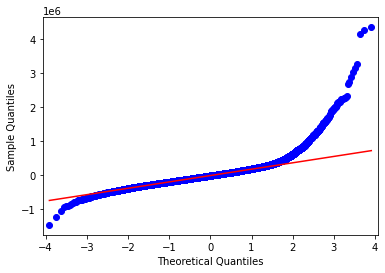

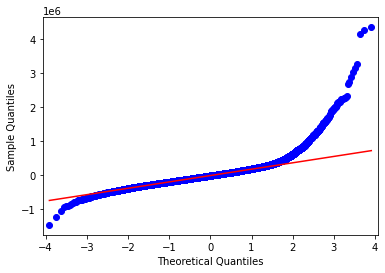

In [23]:
qqplot(df_fsm.resid, line = 'q')

As we can see here, the model actually does predict relatively well, especially among the more central quantiles. However, when the prices get high, the variance starts to increase dramatically. 

# Features
Starting from this point, we ask questions about what we want to glean from the model and state null and alternate hypotheses for each. We want to find whether or not each question we ask, relating to price, can be answered in a statistically significant way. 

#### Condition

Question: Does the condition of the house affect housing price? House condition is a factor that can easily be upgraded by house flippers. 


Hypothesis Testing: 
- Null: The 'condition' of the house has no relationship with the price of the house
- Alternative: The 'condition' of the house does have a relationship with the price of the house

In [27]:
dummy = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
df_dummy = pd.concat([df, dummy], axis=1)
dummy_formula = ''
dummy_formula = ' + '.join(df_dummy.columns[-((len(df['condition'].value_counts())-1)):])

In [25]:
formula = 'price ~ sqft_living + ' + dummy_formula
model = ols(formula, df_dummy).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4307.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:06:22   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21591   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.193e+04   4.83e+04     -0.247      0.805   -1.07e+05    8.28e+04
sqft_living   282.8679      1.941    145.756      0.000     279.064     286.672
condition_2 -6.179e+04   5.22e+04     -1.183      0.237   -1.64e+05    4.06e+04
condition_3 -5.384e+04   4.84e+04     -1.113      0.266   -1.49e+05    4.09e+04
condition_4 -1.868e+04   4.84e+04     -0.386      0.700   -1.14e+05    7.62e+04
condition_5  5.229e+04   4.87e+04      1.074      0.283   -4.32e+04    1.48e+05
==============================================================================
Omnibus:                    14845.154   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556085.012
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      27.208   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
formula = 'price ~ sqft_living + condition'
second_model = ols(formula, df_clean).fit()
second_model_summ = second_model.summary()
second_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.074e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:55:19   Log-Likelihood:            -2.9993e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.982e+05   1.05e+04    -18.886      0.000   -2.19e+05   -1.78e+05
sqft_living   282.7197      1.931    146.394      0.000     278.934     286.505
condition    4.408e+04   2725.518     16.173      0.000    3.87e+04    4.94e+04
==============================================================================
Omnibus:                    14831.537   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           553385.017
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      27.148   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have to come back to this to finish it; condition is a categorical variable that requires dummy variables

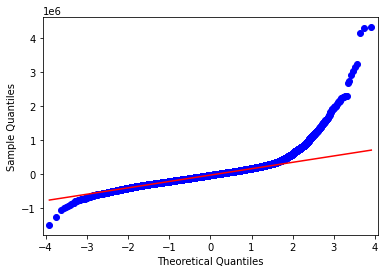

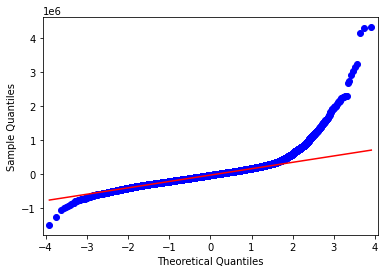

In [52]:
qqplot(second_model.resid, line = 'q')

### View
Next up we add in the feature 'view', which is a number based on the amount of people who visit

It seems to be a categorical variable, with values between 0 and 4. Might need to separate it into dummy variables

In [55]:
df_clean['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### Grade

In [58]:
formula = 'price ~ sqft_living + grade'
third_model = ols(formula, df_clean).fit()
third_model_summ = third_model.summary()
third_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:07:12   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
grade        9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

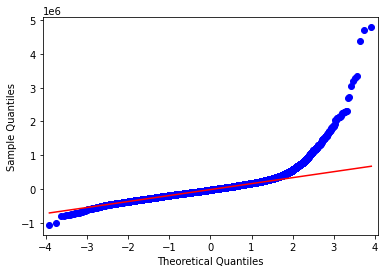

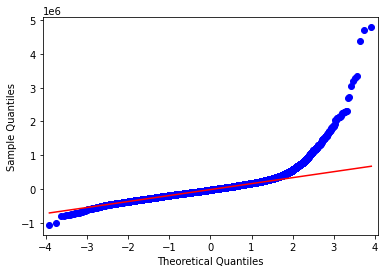

In [59]:
qqplot(third_model.resid, line = 'q')

We don't want to use this due to the strong correlation with sqft_living. 

### Bathrooms

In [61]:
formula = 'price ~ sqft_living + bathrooms'
fourth_model = ols(formula, df_clean).fit()
fourth_model_summ = fourth_model.summary()
fourth_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:08:50   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

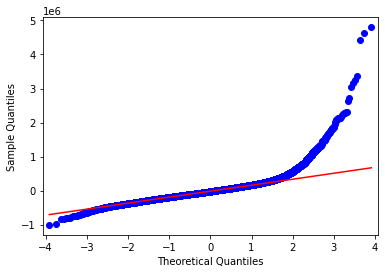

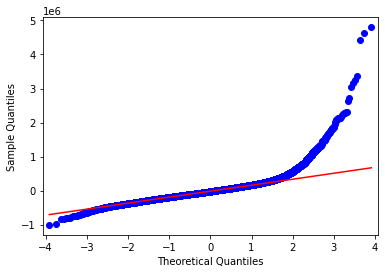

In [62]:
qqplot(fourth_model.resid, line = 'q')

### Bedrooms

In [63]:
formula = 'price ~ sqft_living + grade + bathrooms + bedrooms'
fifth_model = ols(formula, df_clean).fit()
fifth_model_summ = fifth_model.summary()
fifth_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:12:13   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

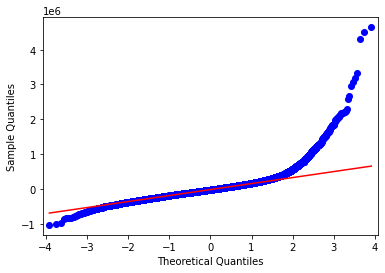

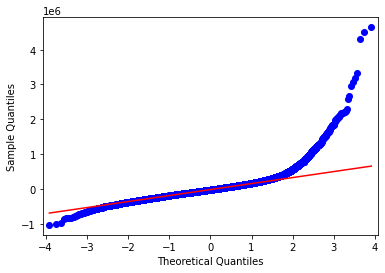

In [64]:
qqplot(fifth_model.resid, line = 'q')

### Floors

In [65]:
formula = 'price ~ sqft_living + grade + bathrooms + bedrooms'
sixth_model = ols(formula, df_clean).fit()
sixth_model_summ = sixth_model.summary()
sixth_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:16   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

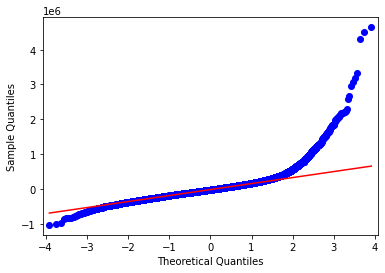

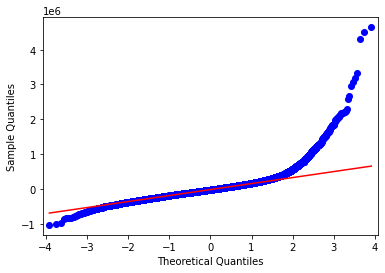

In [66]:
qqplot(sixth_model.resid, line = 'q')

96740.0